In [1]:
import numpy as np
import pandas as pd 

Loading dataset

In [2]:
data = pd.read_csv(r"C:\Users\HP\Downloads\joueursNBA2020.csv", sep=";")
tableau_reduit=data[['nom','equipe','poste','taille','poids','experience','pays']].dropna()
tableau_reduit['poids']=tableau_reduit['poids'].replace(to_replace ='kg', 
value = '', regex = True) 
tableau_reduit['poids']=tableau_reduit['poids'].astype('float') 
tableau_reduit['taille']=tableau_reduit['taille'].astype('float') 
 

In [3]:
print(tableau_reduit.head()) # on affiche le debut du tableau avec la fonction.head()


                 nom equipe poste  taille  poids  experience        pays
0  Aldridge Grayson     MEM     G    1.93   89.8         1.0  États-Unis
1   Allen Al-Farouq     ORL     F    2.03   99.8         9.0  États-Unis
2     Allen Jarrett     BKN     C    2.11  110.2         2.0  États-Unis
3      Allen Kadeem     NYK     G    1.85   90.7         2.0  États-Unis
4        Aminu Kyle     MEM   F-G    2.06  104.3         5.0  États-Unis


In [4]:
print(tableau_reduit)

                       nom equipe poste  taille  poids  experience        pays
0        Aldridge Grayson     MEM     G    1.93   89.8         1.0  États-Unis
1         Allen Al-Farouq     ORL     F    2.03   99.8         9.0  États-Unis
2           Allen Jarrett     BKN     C    2.11  110.2         2.0  États-Unis
3            Allen Kadeem     NYK     G    1.85   90.7         2.0  États-Unis
4              Aminu Kyle     MEM   F-G    2.06  104.3         5.0  États-Unis
5        Anderson Carmelo     POR     F    2.03  108.0        16.0  États-Unis
6            Anthony Ryan     CHI     G    1.90   88.5         2.0  États-Unis
7      Arcidiacono Trevor     POR     F    2.03   97.5        15.0  États-Unis
8              Ariza D.J.     ORL     G    1.80   83.0        11.0  États-Unis
9         Augustin Dwayne     CHA   G-F    1.98  100.2         2.0  États-Unis
10           Bacon Marvin     SAC     F    2.11  106.6         1.0  États-Unis
11       Bagley III Lonzo     NOP     G    1.98   86

Filter data in dataframe

In [5]:
filtre_C = tableau_reduit['poste'] == 'C' 

In [6]:
df_C = tableau_reduit[filtre_C] 

print(df_C) 

                   nom equipe poste  taille  poids  experience        pays
2       Allen Jarrett     BKN     C    2.11  110.2         2.0  États-Unis
12            Ball Mo     ORL     C    2.13  104.8         1.0  États-Unis
39        Brown Moses     POR     C    2.18  111.1         0.0  États-Unis
49            Mo Bamba    ORL     C    2.13  104.8         1.0  États-Unis
50          Khem Birch    ORL     C    2.06  105.7         2.0      Canada
51          Fall Tacko    BOS     C    2.26  141.1         0.0     Sénégal
52  Hartenstein Isaiah    HOU     C    2.13  113.4         1.0   Allemagne
53     Hernandez Dewan    TOR     C    2.08  106.6         0.0  États-Unis
55        Jones Damian    ATL     C    2.11  111.1         3.0  États-Unis
56      DeAndre Jordan    BKN     C    2.11  120.2        11.0  États-Unis


In [7]:
filtre_F = tableau_reduit['poste'] == 'F'
df_F = tableau_reduit[filtre_F] 

print(df_F) 

                       nom equipe poste  taille  poids  experience        pays
1         Allen Al-Farouq     ORL     F    2.03   99.8         9.0  États-Unis
5        Anderson Carmelo     POR     F    2.03  108.0        16.0  États-Unis
7      Arcidiacono Trevor     POR     F    2.03   97.5        15.0  États-Unis
10           Bacon Marvin     SAC     F    2.11  106.6         1.0  États-Unis
14         Bamba Harrison     SAC     F    2.03  102.1         7.0  États-Unis
16           Barton Keita     DEN     F    2.03  103.9         1.0  États-Unis
29        Bradley Jarrell     UTA     F    1.96  113.4         0.0  États-Unis
31         Brantley Mikal     PHX     F    1.98   94.8         1.0  États-Unis
33          Bridges Miles     CHA     F    1.98  102.1         1.0  États-Unis
45           Burton Jimmy     MIA     F    2.01  104.3         8.0  États-Unis
46        Butler Devontae     LAL     F    2.03  108.9         0.0  États-Unis
48  Caldwell-Pope DeMarre     HOU     F    1.98   97

In [8]:
filtre_G = tableau_reduit['poste'] == 'G'
df_G = tableau_reduit[filtre_G] 

print(df_G)

                  nom equipe poste  taille  poids  experience        pays
0   Aldridge Grayson     MEM     G    1.93   89.8         1.0  États-Unis
3       Allen Kadeem     NYK     G    1.85   90.7         2.0  États-Unis
6       Anthony Ryan     CHI     G    1.90   88.5         2.0  États-Unis
8         Ariza D.J.     ORL     G    1.80   83.0        11.0  États-Unis
11  Bagley III Lonzo     NOP     G    1.98   86.2         2.0  États-Unis
15       Barnes Will     DEN     G    1.96   82.1         7.0  États-Unis
19    Bazley Bradley     WAS     G    1.90   93.9         7.0  États-Unis
20        Beal Malik     MIN     G    1.93   84.8         3.0  États-Unis
22    Bembry Patrick     LAC     G    1.85   81.6         7.0  États-Unis
23     Beverley Eric     MIL     G    1.85   97.1         9.0  États-Unis
24    Bledsoe Jordan     DET     G    1.90   81.6         0.0  États-Unis
25        Bone Devin     PHX     G    1.96   93.4         4.0  États-Unis
27       Bowen II Ky     GSW     G    

In [9]:
import matplotlib.pyplot as plt 
from matplotlib.patches import Ellipse, Circle 

View players on a height-weight chart

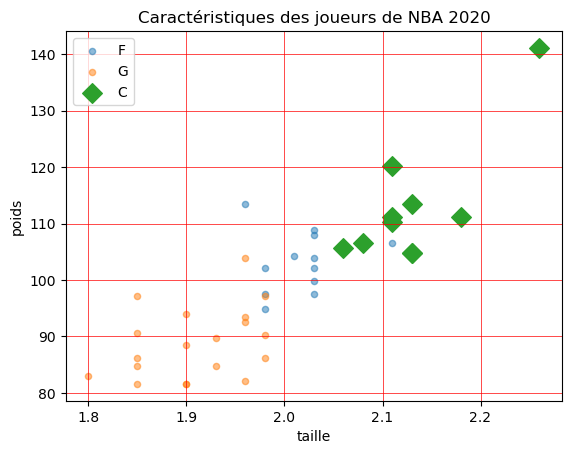

In [10]:
def points(postes, size=20, marker='o', alpha=0.5):
     for poste in postes: 
        df = tableau_reduit[tableau_reduit['poste'] == poste] 
        x = df['taille'] 
        y = df['poids'] 
        plt.scatter(x, y, label=poste, s=size, marker=marker, alpha=alpha) 
 

plt.title('Caractéristiques des joueurs de NBA 2020') 
plt.xlabel("taille") 
plt.ylabel("poids") 
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red') 
points('F') 
points('G') 
points('C',100,'D',1) 
axes = plt.gca() 
plt.legend() 
plt.show()     

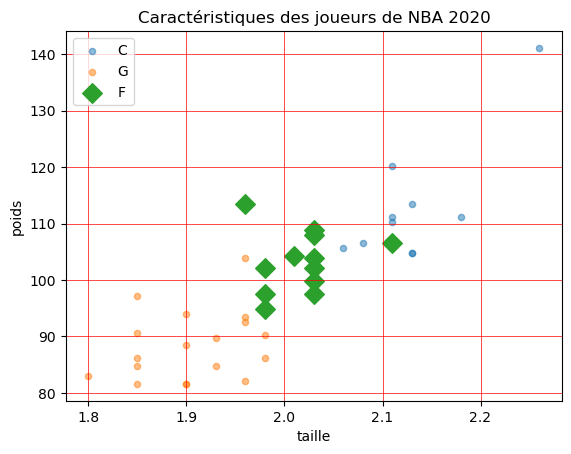

In [11]:
def points(postes, size=20, marker='o', alpha=0.5):
     for poste in postes: 
        df = tableau_reduit[tableau_reduit['poste'] == poste] 
        x = df['taille'] 
        y = df['poids'] 
        plt.scatter(x, y, label=poste, s=size, marker=marker, alpha=alpha) 
 

plt.title('Caractéristiques des joueurs de NBA 2020') 
plt.xlabel("taille") 
plt.ylabel("poids") 
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red') 
points('C') 
points('G') 
points('F',100,'D',1) 
axes = plt.gca() 
plt.legend() 
plt.show()  

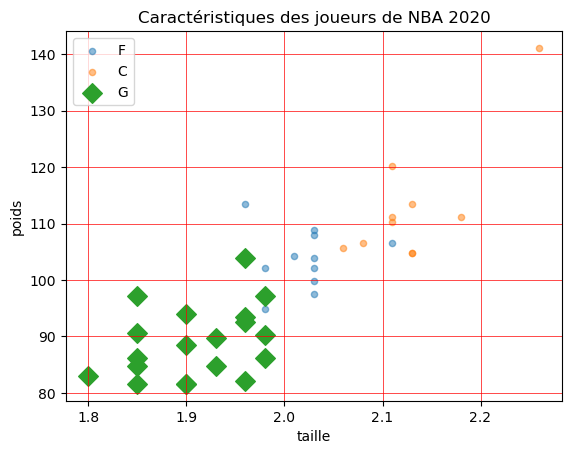

In [12]:
def points(postes, size=20, marker='o', alpha=0.5):
     for poste in postes: 
        df = tableau_reduit[tableau_reduit['poste'] == poste] 
        x = df['taille'] 
        y = df['poids'] 
        plt.scatter(x, y, label=poste, s=size, marker=marker, alpha=alpha) 
 

plt.title('Caractéristiques des joueurs de NBA 2020') 
plt.xlabel("taille") 
plt.ylabel("poids") 
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red') 
points('F') 
points('C') 
points('G',100,'D',1) 
axes = plt.gca() 
plt.legend() 
plt.show()  

Player Position Prediction

Population whose position is unknown

Let's take for example versatile players with the “G-F” label. Are these players rather expected to be G (back), or F (winger)?


In [13]:
filtre_GF = tableau_reduit['poste'] == 'G-F'
df_GF = tableau_reduit[filtre_GF] 

print(df_GF)

                  nom equipe poste  taille  poids  experience        pays
9    Augustin Dwayne     CHA   G-F    1.98  100.2         2.0  États-Unis
17   Bates-Diop Kent     SAC   G-F    1.93   88.5         7.0  États-Unis
21  Beasley DeAndre'     ATL   G-F    1.96   95.3         3.0  États-Unis
34     Brogdon Bruce     DET   G-F    1.93   91.6         1.0  États-Unis
36      Brown Jaylen     BOS   G-F    1.98  101.2         3.0  États-Unis
38    Brown Jr. Troy     WAS   G-F    1.98   97.5         1.0  États-Unis
40    Brown Sterling     MIL   G-F    1.96   99.3         2.0  États-Unis
42     Bryant Reggie     NYK   G-F    1.98   93.0         6.0  États-Unis
44      Burks Deonte     OKC   G-F    1.93  108.9         1.0  États-Unis


Let's display info of player with index 9

In [14]:
print(df_GF.loc[9])

nom           Augustin Dwayne 
equipe                     CHA
poste                      G-F
taille                    1.98
poids                    100.2
experience                 2.0
pays                États-Unis
Name: 9, dtype: object


In [15]:
def joueur(num, rayon):  
    ratio = 0.005 # echelle des X / echelle des Y 
    plt.title('caractéristiques des joueurs de NBA 2020') 
    plt.xlabel("taille") 
    plt.ylabel("poids") 
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='red') 
    points(['F','G','C']) 
    x = tableau_reduit.loc[num]['taille'] 
    y = tableau_reduit.loc[num]['poids'] 
    plt.scatter(x,y,s=50, marker='P', alpha=1) 
    circle = plt.Circle((x, y), 1, color='r') 
    fig = plt.gcf() 
    ax = fig.gca()  # gca() signifie Obtenir l'axe actuel 
    ax.set_aspect(ratio)  # je choisi le ratio DX/DY pour les echelles des axes 
    ax.add_artist(Ellipse((x, y), rayon*ratio, rayon, color='yellow',alpha=0.2)) 
    plt.legend() 
    plt.show() 

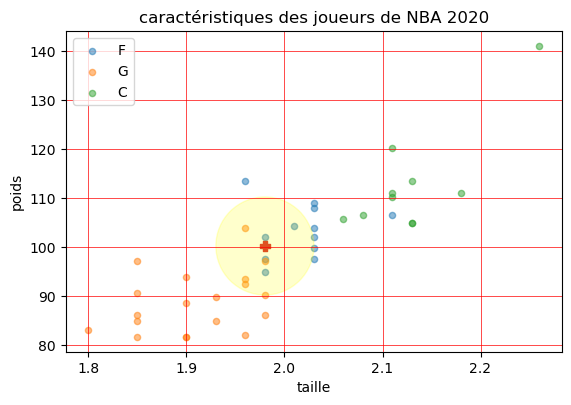

In [16]:

joueur(9,20)


Let's make dataframes of players that are only G players or F players or C players

In [17]:
dataframeG = tableau_reduit[tableau_reduit['poste'] == 'G']
dataframeF = tableau_reduit[tableau_reduit['poste'] == 'F']
dataframeC = tableau_reduit[tableau_reduit['poste'] == 'C']

Let's create a dataframe using these three dataframes that only contains players with known positions

In [18]:
ensemble = pd.concat([dataframeG,dataframeF,dataframeC]) 

In [19]:
print(ensemble.head())

                  nom equipe poste  taille  poids  experience        pays
0   Aldridge Grayson     MEM     G    1.93   89.8         1.0  États-Unis
3       Allen Kadeem     NYK     G    1.85   90.7         2.0  États-Unis
6       Anthony Ryan     CHI     G    1.90   88.5         2.0  États-Unis
8         Ariza D.J.     ORL     G    1.80   83.0        11.0  États-Unis
11  Bagley III Lonzo     NOP     G    1.98   86.2         2.0  États-Unis


Then let's add a new column with the distance to player number num in the
chart

In [20]:
def distance(num,ratio): 
    x = tableau_reduit.loc[num]['taille'] 
    y = tableau_reduit.loc[num]['poids'] 
    ensemble['dist'] = ensemble.apply(lambda row: (((row["taille"] -x)/ratio)**2 + (row["poids"] - y)**2)**0.5, axis=1) 

The player with the most physical profile
close to  player aith index num = 9 and a ratio = 0.005

In [21]:
print(distance(9,0.005))

None


In [22]:
print(ensemble)

                       nom equipe poste  taille  poids  experience  \
0        Aldridge Grayson     MEM     G    1.93   89.8         1.0   
3            Allen Kadeem     NYK     G    1.85   90.7         2.0   
6            Anthony Ryan     CHI     G    1.90   88.5         2.0   
8              Ariza D.J.     ORL     G    1.80   83.0        11.0   
11       Bagley III Lonzo     NOP     G    1.98   86.2         2.0   
15            Barnes Will     DEN     G    1.96   82.1         7.0   
19         Bazley Bradley     WAS     G    1.90   93.9         7.0   
20             Beal Malik     MIN     G    1.93   84.8         3.0   
22         Bembry Patrick     LAC     G    1.85   81.6         7.0   
23          Beverley Eric     MIL     G    1.85   97.1         9.0   
24         Bledsoe Jordan     DET     G    1.90   81.6         0.0   
25             Bone Devin     PHX     G    1.96   93.4         4.0   
27            Bowen II Ky     GSW     G    1.85   84.8         0.0   
28           Bowman 

Let's sort the entire Dataframe according to the dist key

In [23]:
df = ensemble.sort_values(by='dist')

In [24]:
df

,nom,equipe,poste,taille,poids,experience,pays,dist
33,Bridges Miles,CHA,F,1.98,102.1,1.0,États-Unis,1.900000
48,Caldwell-Pope DeMarre,HOU,F,1.98,97.5,10.0,États-Unis,2.700000
43,Bullock Alec,PHI,G,1.98,97.1,8.0,États-Unis,3.100000
31,Brantley Mikal,PHX,F,1.98,94.8,1.0,États-Unis,5.400000
32,Bridges Malcolm,IND,G,1.96,103.9,3.0,États-Unis,5.448853
45,Burton Jimmy,MIA,F,2.01,104.3,8.0,États-Unis,7.267049
25,Bone Devin,PHX,G,1.96,93.4,4.0,États-Unis,7.889233
47,Cacok Kentavious,LAL,G,1.96,92.5,6.0,États-Unis,8.676981
35,Brown Charles,ATL,G,1.98,90.3,0.0,États-Unis,9.900000
1,Allen Al-Farouq,ORL,F,2.03,99.8,9.0,États-Unis,10.007997


Let's build our KNN model

We would now like to count, by position, the players at
characteristics closest to our player in the unknown position. On a
sample of the first k players from the previous table.

knn(k) returns a dictionary score with for each of the keys, 'G', 'F', and 'C', the number of players in the table among the top k.

In [28]:
import pandas as pd

# Fonction knn
def knn(k):
    df= ensemble.sort_values(by='dist')
    top_k = df.head(k)
    score = top_k['poste'].value_counts().to_dict()
    for poste in ['G', 'F', 'C']:
        if poste not in score:
            score[poste] = 0

    return score
#THe 10 nearest neighbors of the player
print( knn(10))


{'F': 5, 'G': 5, 'C': 0}
